The purity of oxygen produced by a fractional distillation process is thought to be related to the percentage of hydrocarbons in the main condenser of the processing unit. Twenty samples are shown below.

In [10]:
import pandas as pd
import statsmodels.api as sm

dat46 = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/46table.csv")
display(dat46.head(8))

# Creating X and y
X1 = dataset['Hydrocarbon (%)']
y1 = dataset['Purity (%)']
dat46 = pd.DataFrame(X1).join(pd.DataFrame(y1))
# Change the column names
dat46.columns =['Hydrocarbon', 'Purity']

# calculate least square estimate coefficients using linear model
model = sm.formula.ols('Purity ~ Hydrocarbon', dat46)
lm46 = model.fit()
display(lm46.params)

,Purity (%),Hydrocarbon (%)
0,86.91,1.02
1,89.85,1.11
2,90.28,1.43
3,86.34,1.11
4,92.58,1.01
5,87.33,0.95
6,86.29,1.11
7,91.86,0.87


Intercept      77.863284
Hydrocarbon    11.801028
dtype: float64

**a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?**

Looking at the normal probability plot, the residuals indicate a moderately skewed/non-normal distribution, therefore there is evidence the data set may violate the assumption of normally distributed errors required for model adequacy.

Intercept      77.863284
Hydrocarbon    11.801028
dtype: float64

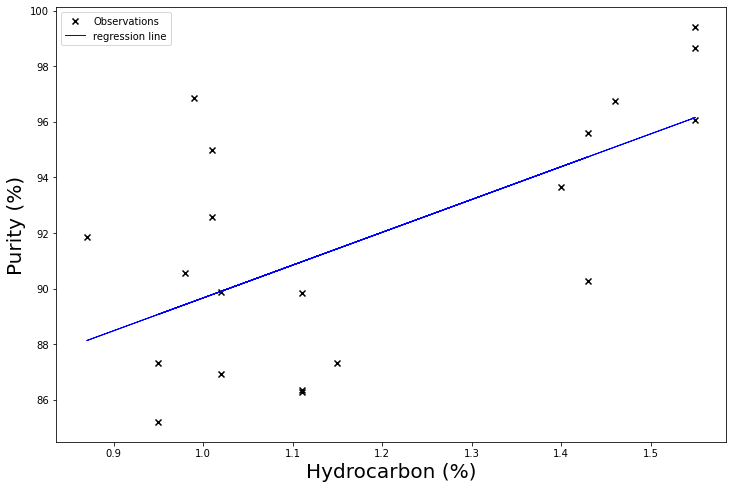

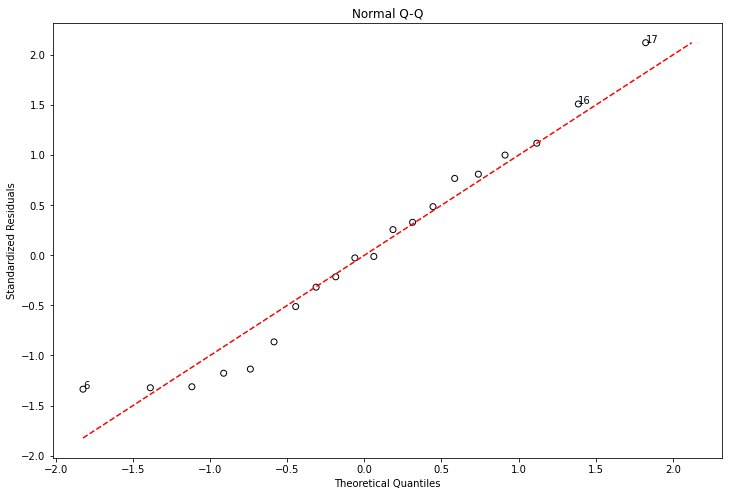

In [9]:
import pandas as pd
import statsmodels.api as sm

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/46table.csv")

# Creating X and y
X1 = dataset['Hydrocarbon (%)']
y1 = dataset['Purity (%)']
dat46 = pd.DataFrame(X1).join(pd.DataFrame(y1))
# Change the column names
dat46.columns =['Hydrocarbon', 'Purity']

# calculate least square estimate coefficients using linear model
model = sm.formula.ols('Purity ~ Hydrocarbon', dat46)
lm46 = model.fit()
display(lm46.params)

from statsmodels.stats.outliers_influence import OLSInfluence as olsi
import matplotlib.pyplot as plt

# basic scatterplot with least squares estimate linear regression line
plt.figure(figsize=(12,8))
plt.scatter(X1,y1,label='Observations', marker='x', color='black')

#Create and plot the regression line
yhat = 11.8010285*X1 + 77.863284
plt.plot(X1, yhat, lw=1, c='blue', label = 'regression line')
plt.xlabel('Hydrocarbon (%)', fontsize = 20)
plt.ylabel('Purity (%)', fontsize = 20)
plt.legend()

import numpy as np
import scipy.stats as scipystats

studentized_residuals = olsi(lm46).resid_studentized
leverage_pts = olsi(lm46).hat_matrix_diag
cook_dist = olsi(lm46).cooks_distance

sorted_student_residuals = pd.Series(studentized_residuals)
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = scipystats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()


**b. Construct and interpret a plot of the residuals versus the predicted response.**

To calculate the residuals and standardized residuals by hand:

 * Residuals/Error values are the difference between response values from the data (y) and predicted response from linear model (y_hat, given a value x)
 * Standardized residuals are the residuals/error values divided by the square root of the Mean Squared Error (MSE)

In [8]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/46table.csv")

# Creating X and y
X1 = dataset['Hydrocarbon (%)']
y1 = dataset['Purity (%)']
dat46 = pd.DataFrame(X1).join(pd.DataFrame(y1))

# Calculate residuals/error values manually
yhat = 11.8010285*X1 + 77.863284
Residuals = y1 - yhat
dfErr = pd.DataFrame(X1).join(pd.DataFrame(Residuals)).sort_values(by='Hydrocarbon (%)')
dfErr.columns = ['Hydrocarbon (%)', 'Residual']
display(dfErr)

# Calculate standardized residuals manually
SS_error = np.sum(np.square(Residuals))
MSE = SS_error/(20-2) #approximate variance or sigma_squared of the sample
StandardizedResiduals = Residuals/(np.sqrt(MSE))
dfStdRes = pd.DataFrame(X1).join(pd.DataFrame(StandardizedResiduals))
dfStdRes.columns = ['Hydrocarbon (%)', 'Standardized Residual']
display(dfStdRes)

,Hydrocarbon (%),Residual
7,0.87,3.729821
18,0.95,-3.874261
5,0.95,-1.744261
19,0.98,1.131708
17,0.99,7.303698
16,1.01,5.217677
4,1.01,2.797677
0,1.02,-2.990333
9,1.02,-0.040333
3,1.11,-4.622426


,Hydrocarbon (%),Standardized Residual
0,1.02,-0.831443
1,1.11,-0.309303
2,1.43,-1.239728
3,1.11,-1.285235
4,1.01,0.777876
5,0.95,-0.484980
6,1.11,-1.299137
7,0.87,1.037052
8,1.43,0.242244
9,1.02,-0.011214


Looking at the residuals plotted against predicted values, they aren't distributed randomly. The large gap in the middle seems to indicate some pattern. Therefore the data violates the assumption of constant variance (Homoscedasticity of errors) required for an adequate regression model. Standardized residuals show several outliers - observations 7:|-1.299|, 17:|1.45|, 18:|2.03| - which could be analyzed for leverage.

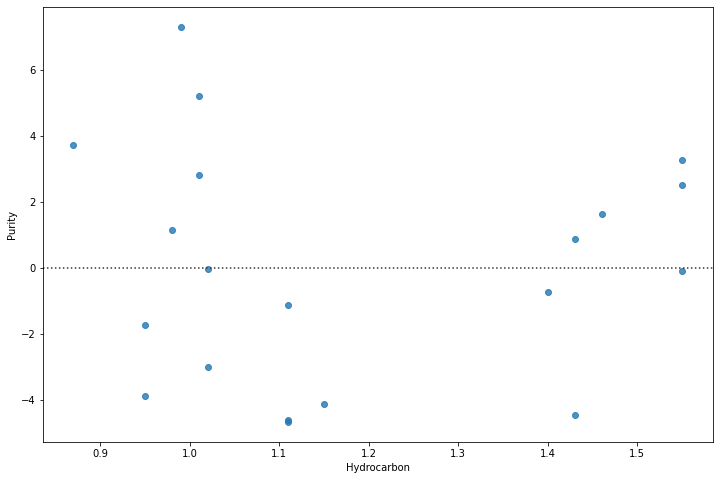

array([-0.86439713, -0.31816538, -1.31228081, -1.32206231,  0.81008566,
       -0.5114297 , -1.33636284,  1.1193882 ,  0.25642111, -0.01165879,
        0.48590043,  1.00060757,  0.76770304, -0.0260111 , -0.21467098,
       -1.17718719,  1.51081239,  2.12273817, -1.13596082,  0.32958687])

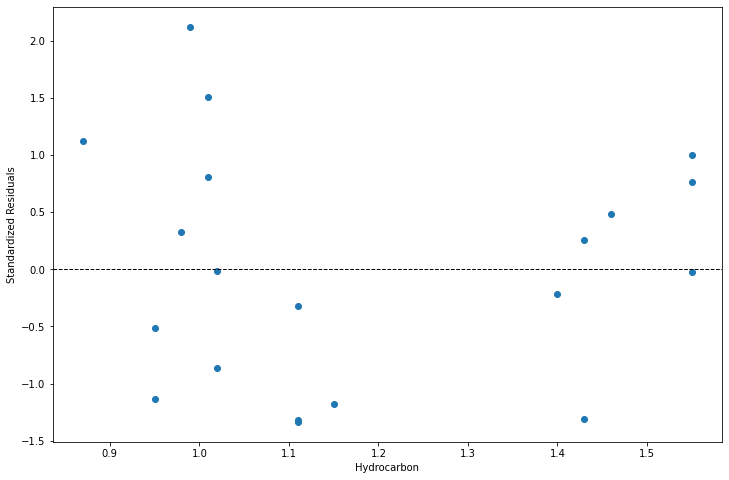

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/46table.csv")

# Creating X and y
X1 = dataset['Hydrocarbon (%)']
y1 = dataset['Purity (%)']
dat46 = pd.DataFrame(X1).join(pd.DataFrame(y1))
dat46.columns = ['Hydrocarbon', 'Purity']

#define figure size
fig = plt.figure(figsize=(12,8))
#view residual plot by itself
sns.residplot(x='Hydrocarbon', y='Purity', data=dat46)

# alternately, produce four diagnostic plots, including residuals
# import statsmodels.api as sm
# fig = sm.graphics.plot_regress_exog(lm46, 'Hydrocarbon', fig=fig)

plt.show()

#fit simple linear regression model
lm46 = ols('Purity ~ Hydrocarbon', data=dat46).fit()
#create influence object containing studentized residuals
influence = lm46.get_influence()
#obtain studentized residuals, which are nearly equal to standardized residuals
standardized_residuals = influence.resid_studentized_internal
#display standardized residuals, not quite equal to our manual calculations above
display(standardized_residuals)

#define figure size
fig = plt.figure(figsize=(12,8))

plt.scatter(X1, standardized_residuals)
plt.xlabel('Hydrocarbon')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()